In [1]:
import librosa, librosa.display
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy
import math
import pandas as pd

In [2]:
#No need to run
no_voice_list = pd.read_csv('no_voice_files.csv', header=None)
filename_list = [name.split("\\")[-1] for name in no_voice_list[0]]

In [3]:
#No need to run
df = pd.read_csv('MLNS_Insects_Fams_05212024.csv')

In [7]:
#This creates the new CSV with mfcc coefficients and f_min cuttoff = 800. Ignores files with length < .5 seconds. No need to run since the csv is now in the git!
ct = 0
n= 40
for name in filename_list:
    #change this file path to the chirp_bucket_2 folder
    file_path = '../../../chirp/'+name
    song, sr = librosa.load(file_path)
    if song.shape[0] > sr/2:
        lib = librosa.feature.mfcc(y=song, sr=sr, fmin = 800, n_mfcc=n)
        for i in range(0,n):
            df.at[df.loc[df['cat_num']==int(name[:-4])].index[0], 'mfcc_'+str(i)+'_avg'] = lib[i].mean()
            df.at[df.loc[df['cat_num']==int(name[:-4])].index[0], 'mfcc_'+str(i)+'_var'] = lib[i].var()
           # df['mfcc_'+str(i)+'_avg']=lib[i].mean()
           # df['mfcc_'+str(i)+'_var']=lib[i].var()
        ct+=1
        if ct % 100 == 0:
            df.to_csv("MLNS_with_mfcc_stats_800_cutoff_05272024.csv")

In [2]:
#Load the csv with mfcc coefficients. No need to run.
df = pd.read_csv('MLNS_with_mfcc_stats_05242024.csv')

/var/folders/5z/7fkzpcz93gz6mqgh9vjgfymm0000gn/T/ipykernel_54989/1583749826.py:1: DtypeWarning: Columns (26,32,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('MLNS_with_mfcc_stats_05232024.csv')


In [65]:
#This creates a new dataframe and csv only containing only etries with voice and nonempty mfcc values. No need to run.
df2=df[0:0]
for name in filename_list:
    df2=pd.concat([df2, df.loc[df['cat_num']==int(name[:-4])]], ignore_index=True)
df2 = df2.dropna(subset=['mfcc_0_avg'])
df2.to_csv("MLNS_with_mfcc_stats_05242024.csv")

In [ ]:
#Start here
df2 = pd.read_csv('MLNS_with_mfcc_stats_05242024.csv')

In [129]:
df2['scientific_name'].value_counts()

scientific_name
Gryllus                      719
Anaxipha                     302
Gryllus rubens               223
Oecanthus quadripunctatus    220
Scudderia texensis           120
                            ... 
Phoebolampta excellens         1
Eremopedes covilleae           1
Bucrates                       1
Neoconocephalus spiza          1
Neocicada hieroglyphica        1
Name: count, Length: 318, dtype: int64

(array([ 1.,  2., 13., 36., 44., 66., 64., 42., 23., 11.]),
 array([-52.08231354, -42.77613449, -33.46995544, -24.16377449,
        -14.85759544,  -5.5514164 ,   3.75476313,  13.06094265,
         22.36712265,  31.6733017 ,  40.97948074]),
 <BarContainer object of 10 artists>)

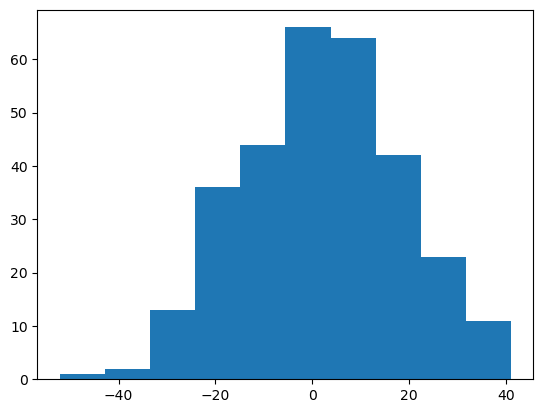

In [114]:
plt.hist(df2.loc[df2['scientific_name'] == 'Anaxipha']['mfcc_10_avg'])

(array([ 11.,  28.,  67., 136., 174., 142.,  66.,  62.,  28.,   5.]),
 array([-29.12595367, -22.28055382, -15.43515205,  -8.5897522 ,
         -1.74435115,   5.10104942,  11.94645023,  18.79185104,
         25.6372509 ,  32.48265076,  39.32805252]),
 <BarContainer object of 10 artists>)

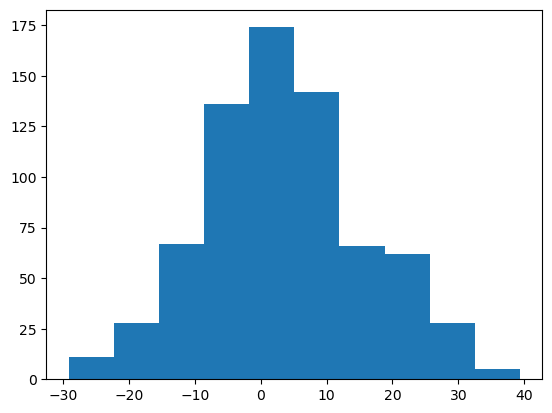

In [115]:
plt.hist(df2.loc[df2['scientific_name'] == 'Gryllus']['mfcc_10_avg'])

(array([ 2.,  9., 11., 33., 45., 50., 37., 23.,  9.,  4.]),
 array([-33.2699585 , -26.24888229, -19.227808  , -12.2067318 ,
         -5.18565655,   1.8354187 ,   8.85649395,  15.8775692 ,
         22.8986454 ,  29.9197197 ,  36.9407959 ]),
 <BarContainer object of 10 artists>)

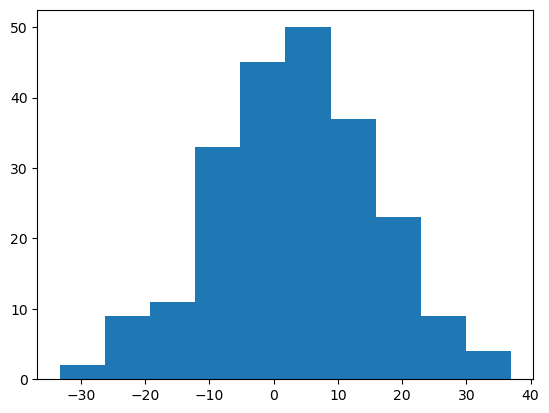

In [116]:
plt.hist(df2.loc[df2['scientific_name'] == 'Gryllus rubens']['mfcc_10_avg'])

(array([ 7., 30., 50., 48., 31., 25., 15.,  7.,  3.,  4.]),
 array([-51.30547714, -41.5162468 , -31.72701645, -21.93778419,
        -12.14855385,  -2.3593235 ,   7.42990732,  17.21913719,
         27.00836945,  36.79759979,  46.58683014]),
 <BarContainer object of 10 artists>)

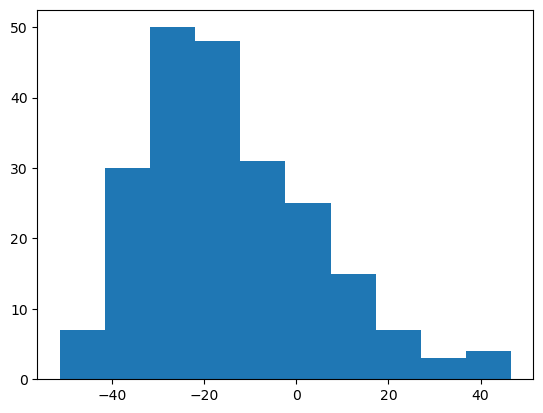

In [117]:
plt.hist(df2.loc[df2['scientific_name'] == 'Oecanthus quadripunctatus']['mfcc_10_avg'])

In [ ]:
#Example code to locate an outlier
df2.loc[(df2['scientific_name'] == 'Gryllus') & (df2['mfcc_2_avg'] < -30) ]